In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_train = pd.read_csv('/content/drive/MyDrive/TimeSeries/TH2/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/TimeSeries/TH2/test.csv')
df_test

,Date,store,product,number_sold
0,2019-01-01,0,0,845
1,2019-01-02,0,0,851
2,2019-01-03,0,0,840
3,2019-01-04,0,0,842
4,2019-01-05,0,0,845
...,...,...,...,...
25545,2019-12-27,6,9,901
25546,2019-12-28,6,9,926
25547,2019-12-29,6,9,913
25548,2019-12-30,6,9,899


In [5]:
product_unique = df_train['product'].unique()

In [6]:
store_uni = []

for i in product_unique:
    unique_stores = df_train.loc[df_train['product'] == i, 'store'].unique().tolist()
    store_uni.append({
        "id": i,
        "store_unique": unique_stores
    })
store_uni

[{'id': np.int64(0), 'store_unique': [0, 1, 2, 3, 4, 5, 6]},
 {'id': np.int64(1), 'store_unique': [0, 1, 2, 3, 4, 5, 6]},
 {'id': np.int64(2), 'store_unique': [0, 1, 2, 3, 4, 5, 6]},
 {'id': np.int64(3), 'store_unique': [0, 1, 2, 3, 4, 5, 6]},
 {'id': np.int64(4), 'store_unique': [0, 1, 2, 3, 4, 5, 6]},
 {'id': np.int64(5), 'store_unique': [0, 1, 2, 3, 4, 5, 6]},
 {'id': np.int64(6), 'store_unique': [0, 1, 2, 3, 4, 5, 6]},
 {'id': np.int64(7), 'store_unique': [0, 1, 2, 3, 4, 5, 6]},
 {'id': np.int64(8), 'store_unique': [0, 1, 2, 3, 4, 5, 6]},
 {'id': np.int64(9), 'store_unique': [0, 1, 2, 3, 4, 5, 6]}]

In [7]:
pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.9/165.9 kB 3.0 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
7191/7191 ━━━━━━━━━━━━━━━━━━━━ 48s 6ms/step - loss: 0.0199 - val_loss: 0.0077
Epoch 2/10
7191/7191 ━━━━━━━━━━━━━━━━━━━━ 85s 7ms/step - loss: 0.0039 - val_loss: 0.0043
Epoch 3/10
7191/7191 ━━━━━━━━━━━━━━━━━━━━ 93s 8ms/step - loss: 0.0022 - val_loss: 0.0031
Epoch 4/10
7191/7191 ━━━━━━━━━━━━━━━━━━━━ 56s 8ms/step - loss: 9.8229e-04 - val_loss: 0.0026
Epoch 5/10
7191/7191 ━━━━━━━━━━━━━━━━━━━━ 52s 7ms/step - loss: 8.6845e-04 - val_loss: 0.0028
Epoch 6/10
7191/7191 ━━━━━━━━━━━━━━━━━━━━ 80s 7ms/step - loss: 8.4436e-04 - val_loss: 0.0026
Epoch 7/10
7191/7191 ━━━━━━━━━━━━━━━━━━━━ 82s 7ms/step - loss: 8.0316e-04 - val_loss: 0.0028
Epoch 8/10
7191/7191 ━━━━━━━━━━━━━━━━━━━━ 80s 7ms/step - loss: 7.9429e-04 - val_loss: 0.0025
Epoch 9/10
7191/7191 ━━━━━━━━━━━━━━━━━━━━ 48s 7ms/step - loss: 7.9209e-04 - val_loss: 0.0026
Epoch 10/10
7191/7191 ━━━━━━━━━━━━━━━━━━━━ 84s 7ms/step - loss: 7.2000e-04 - val_loss: 0.0025
799/799 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Mean Squared Error (test set): 0.00


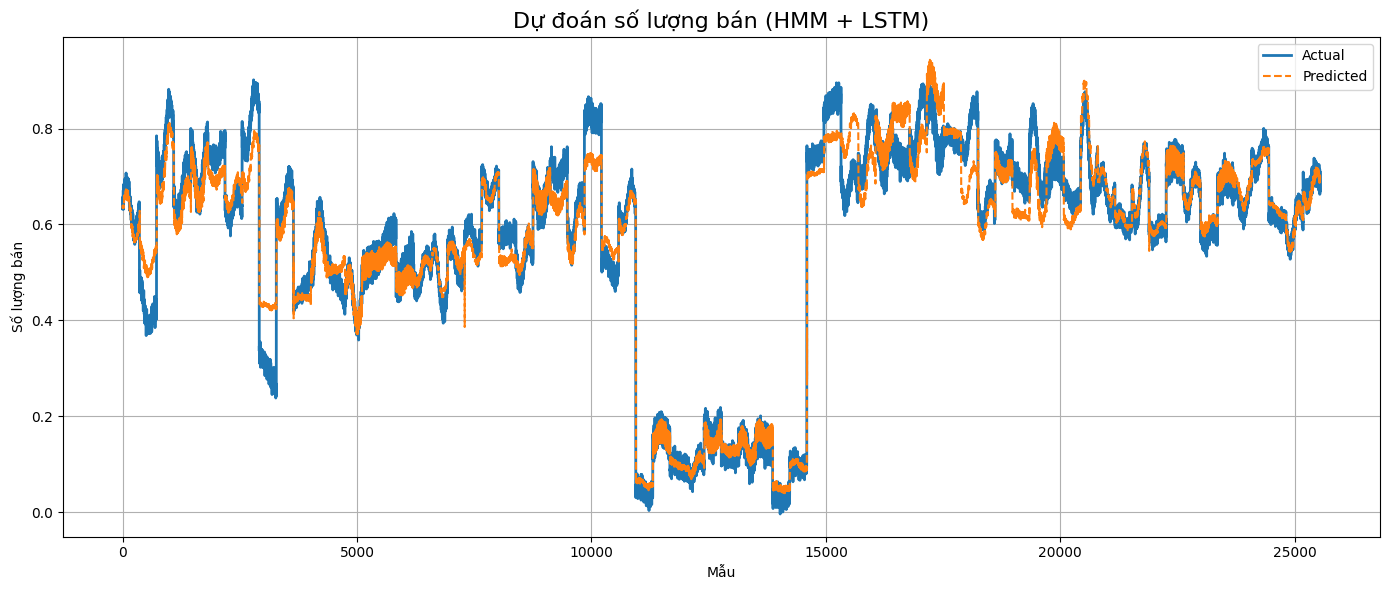

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from hmmlearn.hmm import GaussianHMM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import load_model
import os

for df in [df_train, df_test]:
    df['Date'] = pd.to_datetime(df['Date'])
    df['dayofweek'] = df['Date'].dt.dayofweek
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year
    df['day'] = df['Date'].dt.day
    df['weekofyear'] = df['Date'].dt.isocalendar().week.astype(int)
    df['quarter'] = df['Date'].dt.quarter

# ----- Chuẩn hóa dữ liệu -----
scaler = MinMaxScaler()
scale_cols = ['store', 'product', 'dayofweek', 'month', 'number_sold']
df_train[scale_cols] = scaler.fit_transform(df_train[scale_cols])
df_test[scale_cols] = scaler.transform(df_test[scale_cols])  # Giữ number_sold cho việc đánh giá

# ----- Hàm tạo chuỗi (sliding window) -----
def create_sequences(df, features, target, window_size=7):
    data = df[features].values
    target_data = df[target].values
    X = np.array([data[i:i+window_size] for i in range(len(data) - window_size)])
    y = target_data[window_size:]
    return X, y

features = ['store', 'product', 'dayofweek', 'month', 'quarter']
target = 'number_sold'
window_size = 7

X_train, y_train = create_sequences(df_train, features, target, window_size)
X_test, y_test = create_sequences(df_test, features, target, window_size)

# ----- HMM: Huấn luyện và lưu -----
X_train_flat = X_train.reshape(-1, X_train.shape[2])
X_test_flat = X_test.reshape(-1, X_test.shape[2])

hmm_model = GaussianHMM(n_components=3, covariance_type='diag', n_iter=1000, random_state=42)
hmm_model.fit(X_train_flat)

hidden_states_train = hmm_model.predict(X_train_flat)
hidden_states_test = hmm_model.predict(X_test_flat)

hidden_states_train_seq = hidden_states_train.reshape(-1, window_size, 1)
hidden_states_test_seq = hidden_states_test.reshape(-1, window_size, 1)

# ----- Ghép trạng thái ẩn vào chuỗi đầu vào của LSTM -----
X_train_combined = np.concatenate([X_train, hidden_states_train_seq], axis=-1)
X_test_combined = np.concatenate([X_test, hidden_states_test_seq], axis=-1)

# ----- LSTM: Huấn luyện và lưu -----
model = Sequential([
    LSTM(64, input_shape=(X_train_combined.shape[1], X_train_combined.shape[2]), return_sequences=False),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train_combined, y_train, epochs=10, batch_size=32, validation_data=(X_test_combined, y_test))

# ----- Dự đoán -----
y_pred = model.predict(X_test_combined).flatten()

# ----- Đảo ngược chuẩn hóa chính xác -----
# Chỉ đảo ngược số đã chuẩn hóa, không cần ghép dummy zeros
y_pred_reshaped = y_pred.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)

# Tạo scaler riêng chỉ cho number_sold
number_scaler = MinMaxScaler()
number_scaler.fit(df_train[['number_sold']])
y_pred_rescaled = number_scaler.inverse_transform(y_pred_reshaped).flatten()
y_test_rescaled = number_scaler.inverse_transform(y_test_reshaped).flatten()

# ----- Tính MSE -----
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
print(f'Mean Squared Error (test set): {mse:.2f}')

# ----- Vẽ biểu đồ kết quả -----
plt.figure(figsize=(14, 6))
plt.plot(y_test_rescaled, label='Actual', linewidth=2)
plt.plot(y_pred_rescaled, label='Predicted', linestyle='--')
plt.title('Dự đoán số lượng bán (HMM + LSTM)', fontsize=16)
plt.xlabel('Mẫu')
plt.ylabel('Số lượng bán')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
